<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity2023/blob/main/1001_mst_prim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
[[ ! -d utils ]] && mkdir utils && cd utils
curl -O https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity2023/main/utils/graphs.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1465  100  1465    0     0   2858      0 --:--:-- --:--:-- --:--:--  2855


In [ ]:
from utils import graphs

In [ ]:
%%file 1.graph
2 5 3 1
2 6 6 8
0 5 1 6 5 1 6 6
0 1 5 6
6 5
2 1 3 6
1 8 2 6 4 5 7 2
6 1

Overwriting 1.graph


In [ ]:
with open('1.graph') as file:
    G = []
    for line in file:
        if line.startswith('-'):
            G.append([])
            continue
        nums = list(map(int, line.split()))
        G.append([(nums[i], nums[i+1]) for i in range(0, len(nums), 2)])

    print(G)

[[(2, 5), (3, 1)], [(2, 6), (6, 8)], [(0, 5), (1, 6), (5, 1), (6, 6)], [(0, 1), (5, 6)], [(6, 5)], [(2, 1), (3, 6)], [(1, 8), (2, 6), (4, 5), (7, 2)], [(6, 1)]]


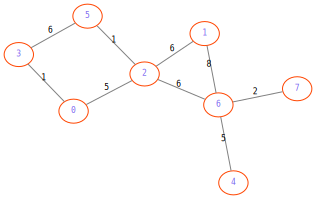

In [28]:
graphs.show(G, weighted=True, layout='neato')

## The great PRIM algorithm

In [23]:
import heapq
import math

def prim(G):
    n = len(G)
    visited = [False]*n
    g = [math.inf]*n
    path = [-1]*n
    pq = []
    heapq.heappush(pq, (0, 0)) # (g(s), s)
    while pq:
        _, u = heapq.heappop(pq)
        visited[u] = True
        for v, w in G[u]:
            if not visited[v] and w < g[v]:
                g[v] = w
                path[v] = u
                heapq.heappush(pq, (w, v))

    return path

In [24]:
path = prim(G)
print(path)

[-1, 2, 0, 0, 6, 2, 2, 6]


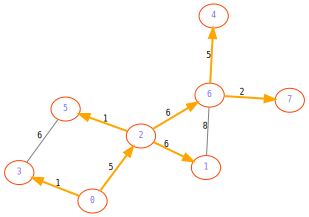

In [27]:
graphs.show(G, weighted=True, path=path, layout='neato')

### Generating a random simple 1 correct path labyrinth

Generate a grid graph

[[1, 4], [0, 2, 5], [1, 3, 6], [2, 7], [0, 5, 8], [1, 4, 6, 9], [2, 5, 7, 10], [3, 6, 11], [4, 9, 12], [5, 8, 10, 13], [6, 9, 11, 14], [7, 10, 15], [8, 13], [9, 12, 14], [10, 13, 15], [11, 14]]


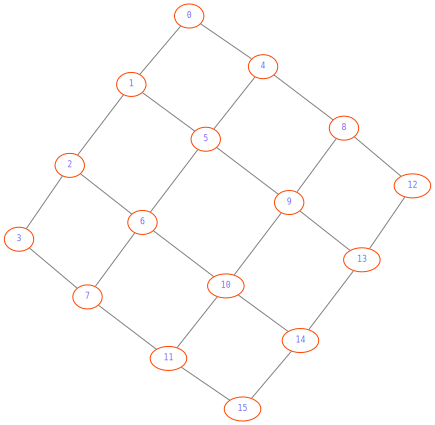

In [32]:
def gridGraph(rows, cols):
    G = [[] for _ in range(rows * cols)]
    positions = [(i, j) for i in range(rows) for j in range(cols)]
    for i, j in positions:
        I = i*cols + j
        if j + 1 < cols:
            J = i*cols + j + 1
            G[I].append(J)
            G[J].append(I)
        if i + 1 < rows:
            J = (i+1)*cols + j
            G[I].append(J)
            G[J].append(I)
    return G

G = gridGraph(4, 4)
print(G)
graphs.show(G)

In [33]:
import random

def mpir(G):
    n = len(G)
    visited = [False]*n
    path = [-1]*n
    stack = [0]
    for aux in G:
        random.shuffle(aux)
    while stack:
        u = stack.pop()
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                path[v] = u
                stack.append(v)

    return path

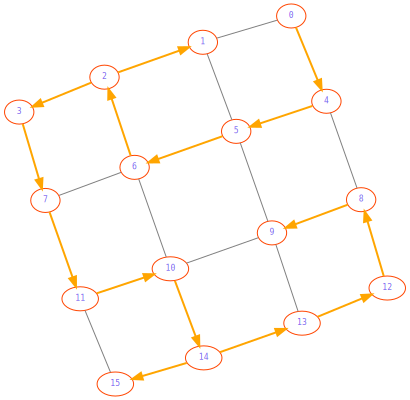

In [35]:
path = mpir(G)
graphs.show(G, path=path)